# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller subproblems on your own.

Additional guidance is provided for concepts that did not make it into our class time. 

# Topic: A selection of the financial industrie's factor zoo. 

you will learn about

- most often used factor returns (market factor, size factor, value factor, profitability , investment , short-term reversal factor, momentum factor)

- linear factor modeling (backbone of todays asset management industry)

- Principal component analysis of factor returns

- Quantifying information content of factors for daily returns on SP500 constituents. 

# Background Knowledge (not necessary, yet helpful to grasp the context, for solving the Problem Set)
$$
\\
$$

**Some quant firm on FF-5**

https://www.robeco.com/en/insights/2015/10/fama-french-5-factor-model-why-more-is-not-always-better.html


# Background Knowledge (not necessary to solve Problem Set):
$$
\\
$$

**If you are curious what industry means by the term Factor Investing, feel free to watch some vidoes of this playlist**

https://www.youtube.com/watch?v=d1fz4LFquv4&list=PLyQSjcv8LwAHcUWCG-zRWbzuczxa0hB3n
$$
\\
$$

**Quant Blog on Fama-French 5-Factor Model**

https://blog.quantinsti.com/fama-french-five-factor-asset-pricing-model/
    

In [27]:
# %load_ext pycodestyle_magic

In [28]:
# enable / disable checking for PEP8
# %pycodestyle_on

In [29]:
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline


R_d = pd.read_csv('R_d.csv', parse_dates=True, index_col=0)
R_d.dropna(inplace=True)

# A.1 five factor Small minus big, High book-value minus low,...
R_fac_5 = R_d[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_x', 'RF_x']]

# A.2 seven factor model (RF_x is risk free rate)
R_fac_7 = R_d[['Mkt-RF', 'SMB', 'HML', 'RMW',
               'CMA_x', 'RF_x', 'ST_Rev', 'Mom   ']]

R_d = pd.read_csv(
    'r_SP500_d_cleaned_Dec2020.csv',
    parse_dates=True,
    index_col=0)
# slice to required date interval
R_d = R_d[R_d.index.isin(pd.date_range('2000-01-04', '2020-10-30'))]
R_d.dropna(inplace=True)

# display(R_d.head())

# A.3 compare size
print("'R_fac_5', 'R_fac_7' and 'R_d' are of equal size: {}".format(
    R_d.shape[0] == R_fac_5.shape[0] == R_fac_7.shape[0]))

display(R_fac_7.tail(1))

# display(R_d.head())

,Mkt-RF,SMB,HML,RMW,CMA_x,RF_x,ST_Rev,Mom
Date,,,,,,,,
2020-10-30,-0.01,-0.00,0.02,0.00,0.00,0.00,0.00,-0.02



## B: Factor Analysis

**B.1** How many principal components are necessary to explain at least 96\% of variations in FF7?

**B.2** How much variance does each principal component of FF7 explain?

**B.3** Does each factor of FF7 span a different risk factor? Defend your answer.  

**B.4** Which of the FF7 factor is most (least) important for explaining the first principal component of US Blue Chip returns?

**B.5** Do FF7 factors explain variations in other than the first principal component of US Blue Chip returns? 
$$
\\
$$

,Mkt-RF,SMB,HML,RMW,CMA_x,ST_Rev,Mom
Mkt-RF,1.00,-0.00,0.00,0.00,0.00,0.00,-0.00
SMB,-0.00,1.00,0.00,0.00,-0.00,-0.00,-0.00
HML,0.00,0.00,1.00,0.00,-0.00,0.00,-0.00
RMW,0.00,0.00,0.00,1.00,0.00,-0.00,0.00
CMA_x,0.00,-0.00,-0.00,0.00,1.00,0.00,0.00
ST_Rev,0.00,-0.00,0.00,-0.00,0.00,1.00,0.00
Mom,-0.00,-0.00,-0.00,0.00,0.00,0.00,1.00


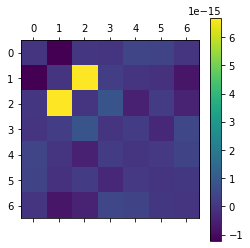

32:80: E501 line too long (80 > 79 characters)
32:80: E501 line too long (80 > 79 characters)
32:80: E501 line too long (80 > 79 characters)


In [30]:
pca = PCA()

# strip risk free rate from factor panel
R_fac_7_stripped = R_fac_7.drop(columns=['RF_x'])
# display(R_fac_7_stripped.tail())

# normalize (unit variance + zero mean).
# See earlier pset for intution
R_fac_7_normalized = pd.DataFrame(
    stats.zscore(R_fac_7_stripped),
    columns=R_fac_7_stripped.columns)
# display(R_fac_7_normalized)

# fit pca mdoel based on stripped factor panel
pca.fit(R_fac_7_normalized)

# count required components and their contribution above threshold
cum_sum = 0.0
num_components = 0

for component in pca.explained_variance_ratio_:
    print(f"{component:10.2f}")
    if(cum_sum < 0.96):
        cum_sum += component
        num_components += 1

# B.1 b1
print(f"Number of components required to explain 96 %: {num_components}")

# B.2 b2_pc1_variance_explained
print(
    f"contribution of first component:{pca.explained_variance_ratio_[0]:10.2f}")

# B.3
# Transform pcs
pc = pca.transform(R_fac_7_normalized)
factors = pd.DataFrame(
    pc,
    index=R_fac_7_normalized.index,
    columns=R_fac_7_normalized.columns)

# display correlation matrix
pd.options.display.float_format = "{:,.2f}".format
display(factors.corr())

# ommit diagonal to better see spanning of factors to other factors
id = np.identity(7)

# print correlation matrix
plt.matshow(factors.corr() - id)
plt.colorbar()
plt.tight_layout()
plt.show()

# B.4

# normalize (unit variance + zero mean) US returns.
# See earlier pset for intution
R_d_normalized = pd.DataFrame(stats.zscore(R_d), columns=R_d.columns)

# fit pca mdoel based on return panel
pca_ret = PCA(n_components=7)
pca_ret.fit(R_d_normalized)

# for component in pca_ret.explained_variance_ratio_:
#     print(f"{component:10.2f}")

# transform time series of pcs
pc = pca_ret.transform(R_d_normalized)
pcs_ret = pd.DataFrame(pc, index=R_d_normalized.index)

# B. 4 / B.5
for pc in pcs_ret.columns:

    print(f"\n======== PC {pc + 1} ========")

    for factor in factors.columns:
        GLS_ret_market_factor = sm.GLS(pcs_ret[pc], factors[factor])
        Fit_ret_factor = GLS_ret_market_factor.fit()
        print(f"{factor} with R^2:{Fit_ret_factor.rsquared:10.2f}")

# Observation B.5: Market factor is most close to one. See out.Fit_ret_factor
# Observation B.4: Other factors do explain variations e. g. see PC 3 with
# SMB. Overall R^2 is pretty small and the percentage that is explained
# rather minor.

# Tasks [Degree of Difficulty: Advanced]:

$$
\\
$$

**Notice:** The return data for SP500 constituents is given in "r_SP500_d_cleaned_Dec2020.csv"

$$
\\
$$

## A: Getting Data

**A.1** Get daily returns of so called FF5 factor returns (MKT, size, HML, RMW, CMA) and the risk-free rate  

**A.2** Include the short-term reversal and momentum factor to end up with a FF7 factor return matrix

**A.3** Ensure that the daily returns of SP500 constituents (data file is delivered) aligns with A.1 and A.2 

$$
\\
$$
**Hint:**
H_A_1: Page 12 of https://buildmedia.readthedocs.org/media/pdf/pandas-datareader/stable/pandas-datareader.pdf

H_A_3: The aligned data consists of 5241 data points, starts on Jan 4th 2000 and ends October 30th 2020.

$$
\\
$$
 
 

## B: Factor Analysis

**B.1** How many principal components are necessary to explain at least 96\% of variations in FF7?

**B.2** How much variance does each principal component of FF7 explain?

**B.3** Does each factor of FF7 span a different risk factor? Defend your answer.  

**B.4** Which of the FF7 factor is most (least) important for explaining the first principal component of US Blue Chip returns?

**B.5** Do FF7 factors explain variations in other than the first principal component of US Blue Chip returns? 
$$
\\
$$
**Hint:**
B.3: look at correlation table and/or regress every factor onto all other FF7.

B.4: use regression techniques to answer this question

B.5: use regression techniques to answer this question

 

# Tasks [Degree of Difficulty: Expert]:


$$
\\
$$

**Notice:** The return data for SP500 constituents is given in "r_SP500_d_cleaned_Dec2020.csv"

$$
\\
$$

## A: Getting Data

**A.1** Get daily returns of so called FF5 factor returns (MKT, size, HML, RMW, CMA) and the risk-free rate  

**A.2** Include the short-term reversal and momentum factor to end up with a FF7 factor return matrix

**A.3** Ensure that the daily returns of SP500 constituents (data file is delivered) aligns with A.1 and A.2 

$$
\\
$$
**Hint:**
H_A_3: The aligned data consists of 5241 data points, starts on Jan 4th 2000 and ends October 30th 2020.

$$
\\
$$

 

## B: Factor Analysis

**B.1** How many principal components are necessary to explain at least 96\% of variations in FF7?

**B.2** How much variance does each principal component of FF7 explain?

**B.3** Does each factor of FF7 span a different risk factor? Defend your answer.

**B.4** Which of the FF7 factor is most (least) important for explaining the first principal component of US Blue Chip returns?

**B.5** Do FF7 factors explain variations in other than the first principal component of US Blue Chip returns? 

 